In [60]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import pkg_resources
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import numpy

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model_families = [
    ['wiki_cnn_v3_100', 'wiki_cnn_v3_101', 'wiki_cnn_v3_102'],
    ['wiki_debias_cnn_v3_100', 'wiki_debias_cnn_v3_101', 'wiki_debias_cnn_v3_102'],
]

In [5]:
# Read the scored data into DataFrame
df = pd.read_csv('eval_datasets/bias_madlibs_77k_scored.csv')

In [6]:
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(df, 'text', terms)

In [12]:
eq_diff

subgroup  subset_size  \
0            lesbian         3028   
1                gay         3028   
2           bisexual         3028   
3        transgender         3028   
4              trans         3028   
5              queer         3028   
6               lgbt         3028   
7              lgbtq         3028   
8         homosexual         3028   
9           straight         3028   
10      heterosexual         3028   
11              male         3028   
12            female         3028   
13         nonbinary         3028   
14           african         6056   
15  african american         3028   
16             black         3028   
17             white         3028   
18          european         3028   
19          hispanic         3028   
20            latino         3028   
21            latina         3028   
22            latinx         3028   
23           mexican         3028   
24          canadian         3028   
25          american         6056   
26             asian         3028   
27            indian         3028   
28    middle eastern         3028   
29           chinese         3028   
30          japanese         3028   
31         christian         3028   
32            muslim         3028   
33            jewish         3028   
34          buddhist         3028   
35          catholic         3028   
36        protestant         3028   
37              sikh         3028   
38            taoist         3028   
39               old         3028   
40             older         3028   
41             young         3028   
42           younger         3028   
43           teenage         3028   
44         millenial         3028   
45       middle aged         3028   
46           elderly         3028   
47             blind         3028   
48              deaf         3028   
49         paralyzed         3028   

                                  wiki_cnn_v3_10_aucs  \
0   [0.9548312120259794, 0.9276976831482646, 0.939...   
1   [0.9511103839441536, 0.927964659685864, 0.9336...   
2   [0.9441652443609269, 0.9352067911080544, 0.937...   
3   [0.9546176050584473, 0.9440825192380208, 0.947...   
4   [0.9709339989662783, 0.9726548312519208, 0.972...   
5   [0.9009793066018885, 0.9051313362406703, 0.886...   
6   [0.9714781343347422, 0.9654563254090047, 0.968...   
7   [0.9636896320381184, 0.9668725618962439, 0.971...   
8   [0.9565726117292297, 0.9333191110087335, 0.938...   
9   [0.9736638204082486, 0.9718013622252123, 0.969...   
10  [0.9628766863818555, 0.9656358235688449, 0.970...   
11  [0.9676336709820608, 0.9680638578864909, 0.961...   
12  [0.9673334729786343, 0.9660971756737886, 0.962...   
13  [0.9629683375696549, 0.9636932548217253, 0.970...   
14  [0.9515985135625638, 0.9579753790258408, 0.971...   
15  [0.9511103345618518, 0.9562560640644412, 0.970...   
16  [0.9673331745267213, 0.9643206480007818, 0.972...   
17  [0.968657710916555, 0.9662568856819704, 0.9718...   
18  [0.943211064210377, 0.9546692407534657, 0.9574...   
19  [0.9657107269998604, 0.9647243211643166, 0.971...   
20  [0.965633633093839, 0.9649844331629475, 0.9717...   
21  [0.9671493487456548, 0.9686644923287403, 0.971...   
22  [0.9617624552163663, 0.9621838969134413, 0.969...   
23  [0.9607543988196208, 0.9652890484567309, 0.954...   
24  [0.9436608809220536, 0.9551136792561922, 0.942...   
25  [0.952295467633432, 0.951586426458655, 0.96332...   
26  [0.9560149646063066, 0.9476840853811501, 0.965...   
27  [0.9565832530103653, 0.9594451952895817, 0.966...   
28  [0.9354473924737633, 0.9519203879386505, 0.967...   
29  [0.9579533828517829, 0.9373942824733048, 0.960...   
30  [0.9494381091114057, 0.943517084894626, 0.9429...   
31  [0.9657588032431796, 0.9615894371988422, 0.968...   
32  [0.9658216766813573, 0.9619843968950895, 0.967...   
33  [0.9672328720508168, 0.9646833118106938, 0.971...   
34  [0.9617051023343377, 0.9308199449054569, 0.958...   
35  [0.9700647196246392, 0.9606418738370862, 0.970...   
36  [0.96632137

In [13]:
eq_diff = model_bias_analysis.per_subgroup_aucs(df, terms, model_families, 'label')
# sort to guarantee deterministic output
#eq_diff.sort_values(by=['model_family'], inplace=True)
#eq_diff.reset_index(drop=True, inplace=True)

In [41]:
colors = ["g", "r"]
formats = ["^", "o"]

In [49]:
for ind in range(len(terms)):
    col

50

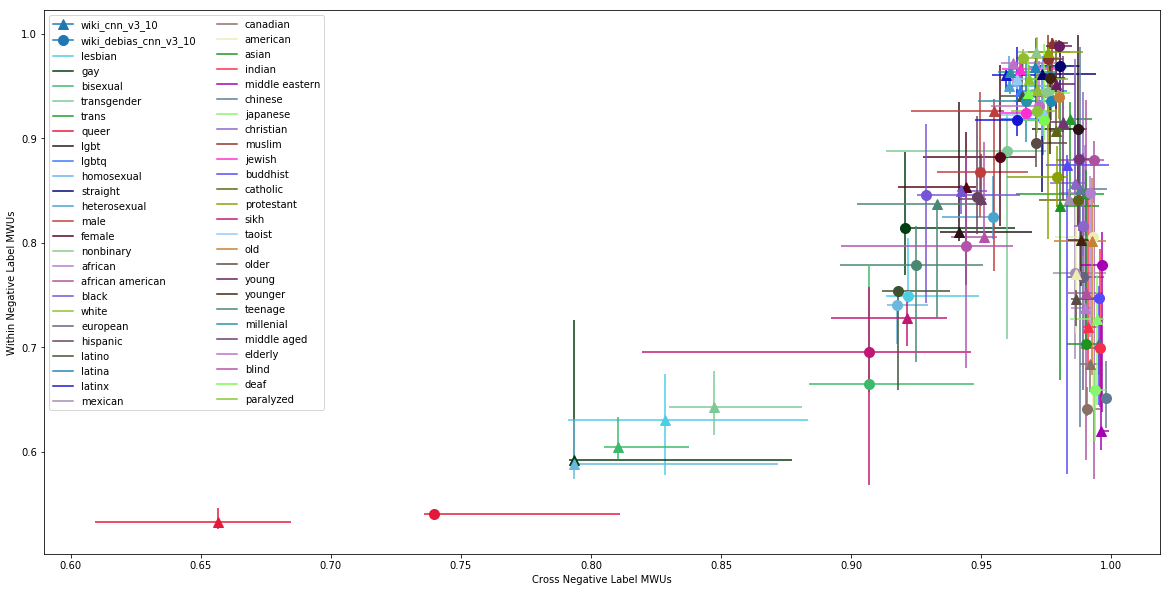

In [68]:
plt.figure(figsize=(20, 10))
colors = []
markerlegend = []
colorlegend = []
for ind, model in enumerate(model_families):
    name = model_bias_analysis.model_family_name(model)
    markerlegend.append(mlines.Line2D([], [], marker=formats[ind], markersize=10, label=name))
for gind, group in enumerate(terms):
    colors.append(numpy.random.rand(3,))
    colorlegend.append(mlines.Line2D([], [], color=colors[gind], markersize=10, label=group))
    for ind, model in enumerate(model_families):
        x = []
        y = []
        lxerr = []
        rxerr = []
        lyerr = []
        ryerr = []
        name = model_bias_analysis.model_family_name(model)
        cross = name + '_cross_subgroup_negative_mwus'
        within = name + '_within_negative_label_mwus'
        l = sorted(list(eq_diff[eq_diff['subgroup'] == group][cross])[0])
        x.append(l[1])
        lxerr.append(l[1] - l[0])
        rxerr.append(l[2] - l[1])
        l = sorted(list(eq_diff[eq_diff['subgroup'] == group][within])[0])
        y.append(l[1])
        lyerr.append(l[1] - l[0])
        ryerr.append(l[2] - l[1])
        plt.errorbar(x, y, xerr = [lxerr, rxerr], yerr=[lyerr, ryerr], 
                     fmt = formats[ind], color = colors[gind], markersize=10)
plt.xlabel("Cross Negative Label MWUs")
plt.ylabel("Within Negative Label MWUs")
plt.legend(handles=markerlegend + colorlegend, ncol=2)

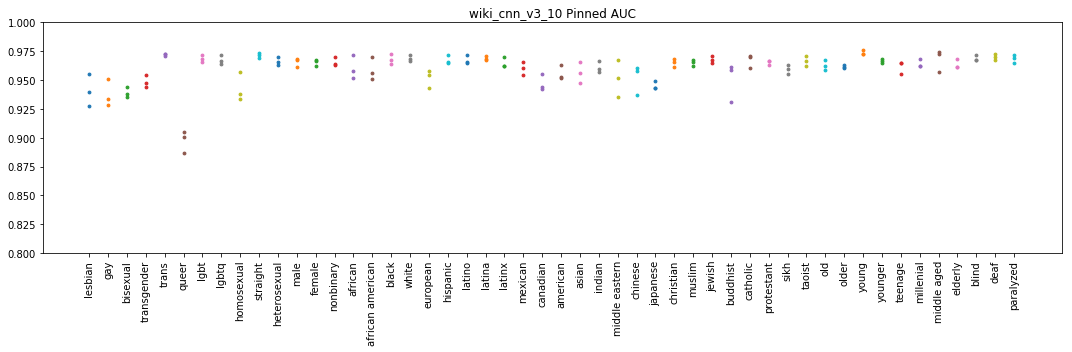

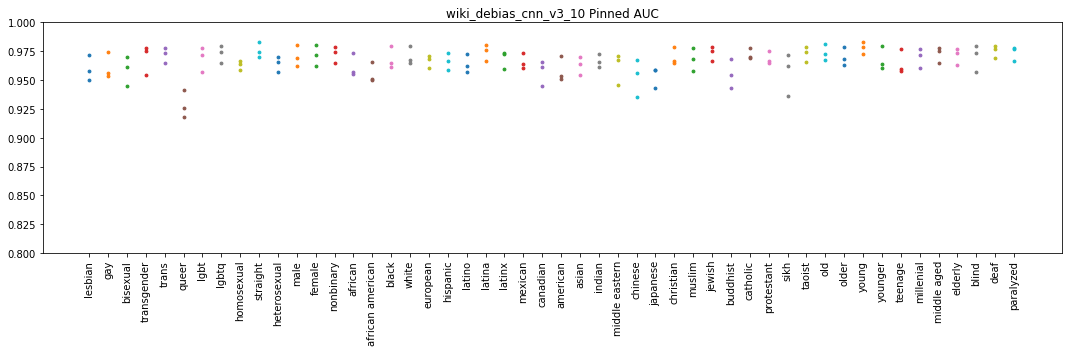

In [177]:
pinned_auc_results = model_bias_analysis.per_subgroup_aucs(df, terms, model_families, 'label')
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_aucs',
        title=name + ' Pinned AUC',
        y_lim=(0.8, 1.0))

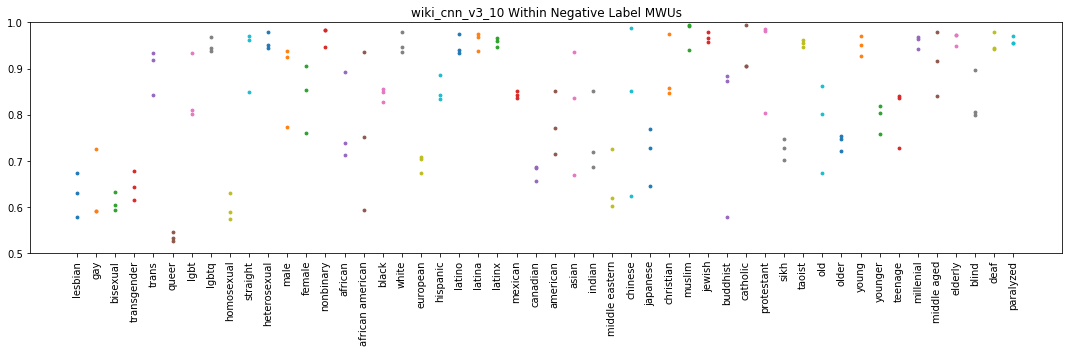

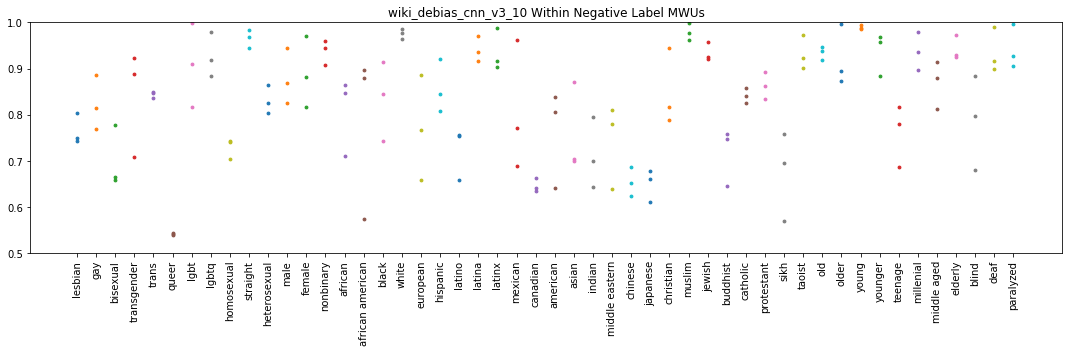

In [178]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_negative_label_mwus',
        title=name + ' Within Negative Label MWUs',
        y_lim=(0.5, 1.0))

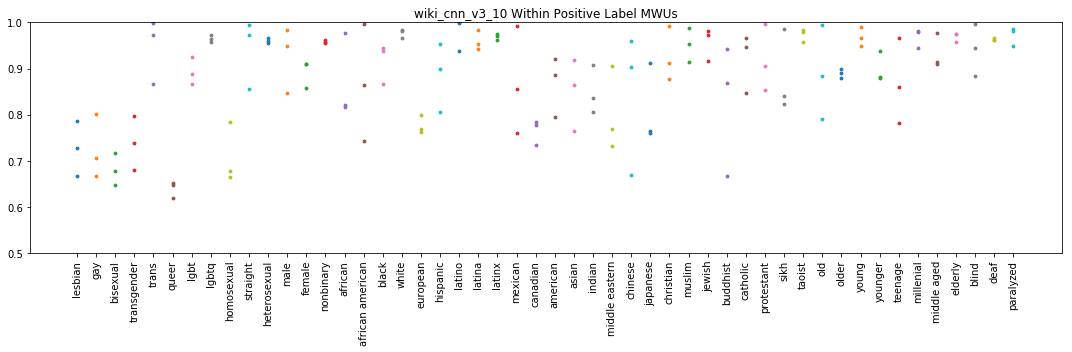

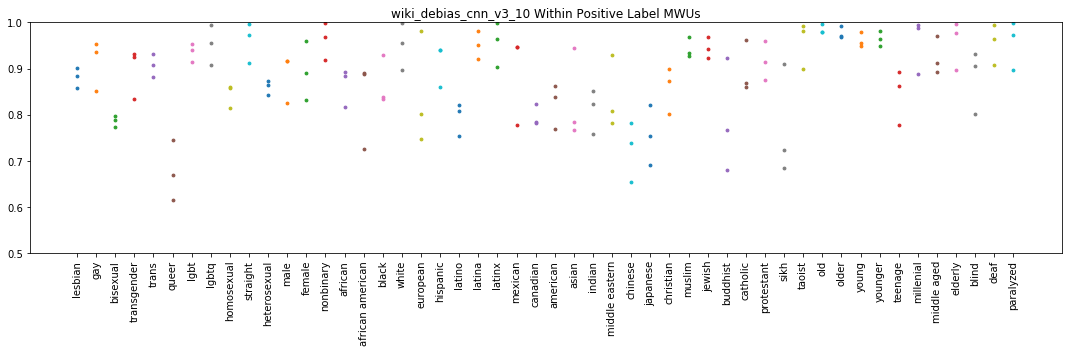

In [179]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_positive_label_mwus',
        title=name + ' Within Positive Label MWUs',
        y_lim=(0.5, 1.0))

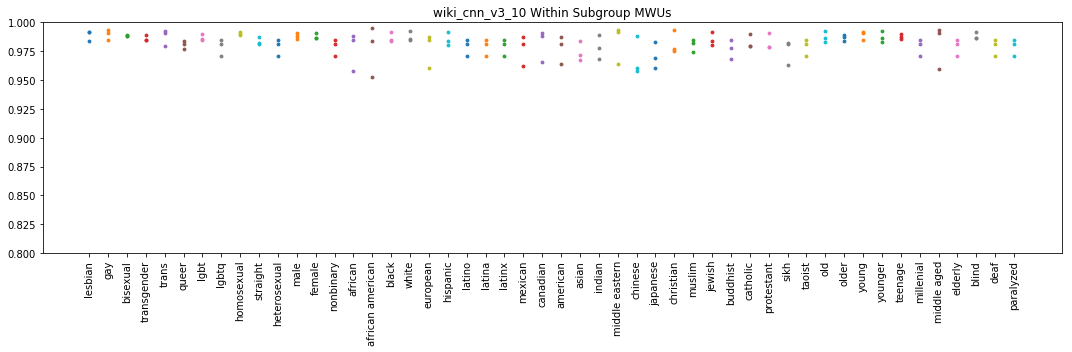

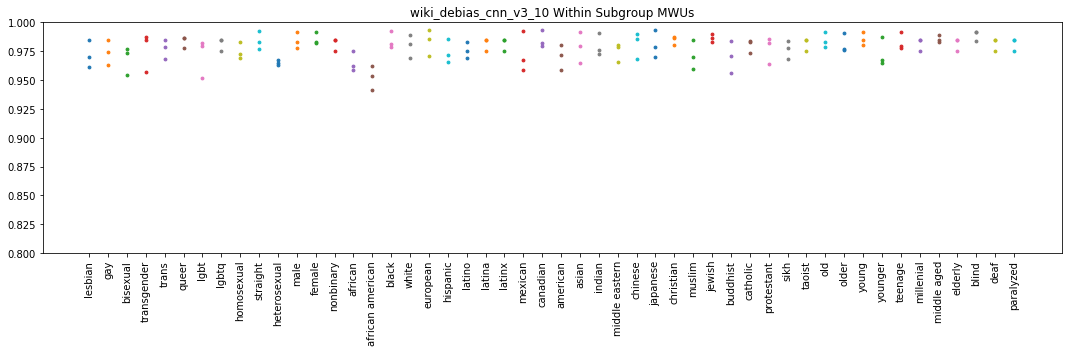

In [180]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_within_subgroup_mwus',
        title=name + ' Within Subgroup MWUs',
        y_lim=(0.8, 1.0))

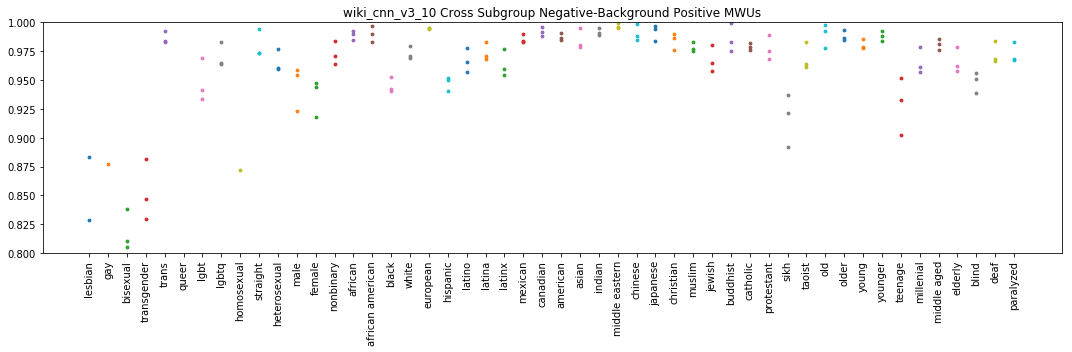

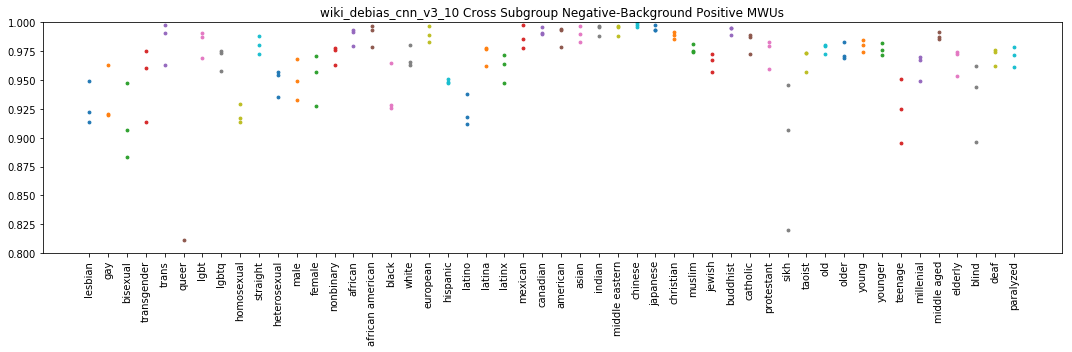

In [181]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_cross_subgroup_negative_mwus',
        title=name + ' Cross Subgroup Negative-Background Positive MWUs',
        y_lim=(0.8, 1.0))

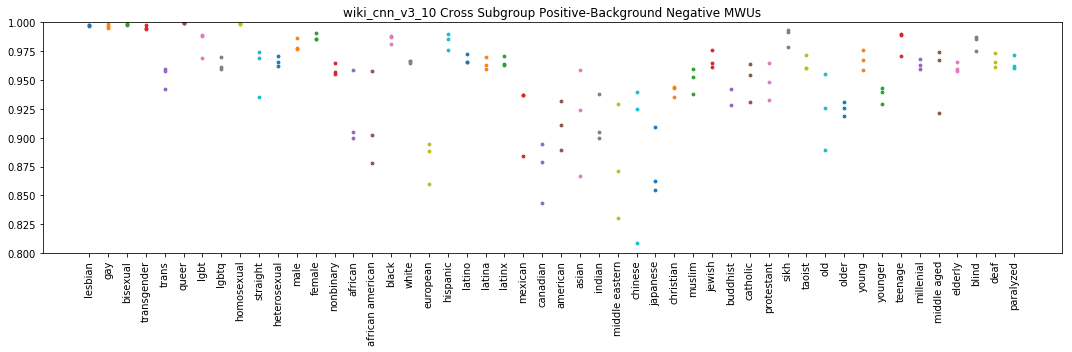

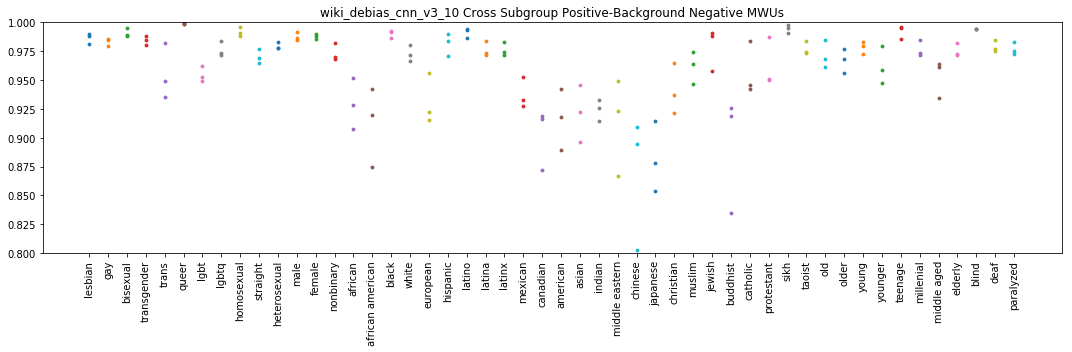

In [182]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        pinned_auc_results,
        'subgroup',
        name + '_cross_subgroup_positive_mwus',
        title=name + ' Cross Subgroup Positive-Background Negative MWUs',
        y_lim=(0.8, 1.0))